In [26]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
import pickle
import json

Load in CSV file of data collected from DB, file is viewable on EC2. In this section I first gathered the string of each station address to be added to the html, removing duplicate entries.

In [27]:
df = pd.read_csv("/Users/os/Desktop/dynamicbikes.csv")

In [28]:
test_df = df[['number', 'address']].copy()
test_df.drop_duplicates(inplace=True)

In [29]:
test_df[test_df.number == 2].iloc[0,1]

'BLESSINGTON STREET'

In [30]:
stations_set = {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117}
for i in stations_set:
    stations = test_df[test_df.number == i]
    print(f'<option value="{stations.iloc[0,0]}">{stations.iloc[0,1]}</option>')

<option value="2">BLESSINGTON STREET</option>
<option value="3">BOLTON STREET</option>
<option value="4">GREEK STREET</option>
<option value="5">CHARLEMONT PLACE</option>
<option value="6">CHRISTCHURCH PLACE</option>
<option value="7">HIGH STREET</option>
<option value="8">CUSTOM HOUSE QUAY</option>
<option value="9">EXCHEQUER STREET</option>
<option value="10">DAME STREET</option>
<option value="11">EARLSFORT TERRACE</option>
<option value="12">ECCLES STREET</option>
<option value="13">FITZWILLIAM SQUARE WEST</option>
<option value="15">HARDWICKE STREET</option>
<option value="16">GEORGES QUAY</option>
<option value="17">GOLDEN LANE</option>
<option value="18">GRANTHAM STREET</option>
<option value="19">HERBERT PLACE</option>
<option value="21">LEINSTER STREET SOUTH</option>
<option value="22">TOWNSEND STREET</option>
<option value="23">CUSTOM HOUSE</option>
<option value="24">CATHAL BRUGHA STREET</option>
<option value="25">MERRION SQUARE EAST</option>
<option value="26">MERRION SQUA

# Section 1 

In this section I work on cleaning the data, dropping unnecessary columns like address as the same values are represented by number, and converting columns with values of only two strings to binary in order to make it applicable for model training. 

In [31]:
df.head()

,number,address,status,position_lat,position_lng,bikes,bike_stands,banking,last_update
0,42,SMITHFIELD NORTH,OPEN,53.349562,-6.278198,16,14,False,2147483647
1,30,PARNELL SQUARE NORTH,OPEN,53.353462,-6.265305,3,17,False,2147483647
2,54,CLONMEL STREET,OPEN,53.336021,-6.262980,4,29,False,2147483647
3,108,AVONDALE ROAD,OPEN,53.359405,-6.276142,0,35,False,2147483647
4,56,MOUNT STREET LOWER,OPEN,53.337960,-6.241530,6,34,False,2147483647


In [32]:
df.tail()

,number,address,status,position_lat,position_lng,bikes,bike_stands,banking,last_update
446457,39,WILTON TERRACE,OPEN,53.332383,-6.252717,11,9,False,1649171493000
446458,83,EMMET ROAD,OPEN,53.340714,-6.308191,8,32,False,1649171288000
446459,92,HEUSTON BRIDGE (NORTH),OPEN,53.347802,-6.292432,0,40,False,1649171418000
446460,21,LEINSTER STREET SOUTH,OPEN,53.342180,-6.254485,6,24,False,1649171164000
446461,88,BLACKHALL PLACE,OPEN,53.348800,-6.281637,10,20,False,1649171486000


In [33]:
df["number"] = df ["number"] #assigning each column to a name 
df["last_update"] = df["last_update"]
df["bikes"] = df["bikes"]
df["address"] = df["address"]
df["status"] = df["status"]
df["position_lat"] = df["position_lat"]
df["position_lng"] = df["position_lng"]
df["bike_stands"] = df["bike_stands"]
df["banking"] = df["banking"]
df["last_update"] = df["last_update"]

In [34]:
df.dtypes #check dtypes for model training incompatibilities

number            int64
address          object
status           object
position_lat    float64
position_lng    float64
bikes             int64
bike_stands       int64
banking            bool
last_update       int64
dtype: object

In [35]:
df.drop(df.index[df["last_update"] == 2147483647], inplace=True) #dropped set of duplicate values

In [36]:
df['last_update'] = df['last_update'].astype(str).str[:-3].astype(np.int64) #shortened the last update to seconds

In [37]:
df.head()

,number,address,status,position_lat,position_lng,bikes,bike_stands,banking,last_update
4745,42,SMITHFIELD NORTH,OPEN,53.349562,-6.278198,24,6,False,1646334307
4746,30,PARNELL SQUARE NORTH,OPEN,53.353462,-6.265305,0,20,False,1646334561
4747,54,CLONMEL STREET,OPEN,53.336021,-6.262980,8,25,False,1646334736
4748,108,AVONDALE ROAD,OPEN,53.359405,-6.276142,17,18,False,1646334641
4749,56,MOUNT STREET LOWER,OPEN,53.337960,-6.241530,14,26,False,1646334476


In [38]:
df['last_update'] = pd.to_datetime(df['last_update'],unit='s') #converted unixtime to datetime
df['status'] = df['status'].replace({'OPEN':'1', 'CLOSED':'0'})
df['status'] = df['status'].astype(int)
df['banking'] = df['banking'].replace({'False':'0', 'True':'1'}).astype(int)

In [39]:
df.head()

,number,address,status,position_lat,position_lng,bikes,bike_stands,banking,last_update
4745,42,SMITHFIELD NORTH,1,53.349562,-6.278198,24,6,0,2022-03-03 19:05:07
4746,30,PARNELL SQUARE NORTH,1,53.353462,-6.265305,0,20,0,2022-03-03 19:09:21
4747,54,CLONMEL STREET,1,53.336021,-6.262980,8,25,0,2022-03-03 19:12:16
4748,108,AVONDALE ROAD,1,53.359405,-6.276142,17,18,0,2022-03-03 19:10:41
4749,56,MOUNT STREET LOWER,1,53.337960,-6.241530,14,26,0,2022-03-03 19:07:56


In [40]:
df['time'] = pd.to_datetime(df['last_update']).dt.time
df["day"] = pd.to_datetime(df['last_update']).dt.day_of_week
df['time'] = df['time'].astype(str).str[:-6].astype(np.int64) #broke down date time into simple representations of day and hour 

in the above cell I broke down the date and time as I felt it would be a better representation of bike availability to simply focus training specific days and hours of the week as opposed to months and years as it would provide better focus for the data to be trained on fewer variables. 

In [41]:
df.drop(columns=['last_update','address','position_lat', 'position_lng'], inplace=True) #dropped unneeded categoricals and constants, lat and long do not affect data training

In [42]:
df.head()

,number,status,bikes,bike_stands,banking,time,day
4745,42,1,24,6,0,19,3
4746,30,1,0,20,0,19,3
4747,54,1,8,25,0,19,3
4748,108,1,17,18,0,19,3
4749,56,1,14,26,0,19,3


In [43]:
df.dtypes #ensuring everything is an int for setting up model

number         int64
status         int64
bikes          int64
bike_stands    int64
banking        int64
time           int64
day            int64
dtype: object

# Section 2 

In this section I analyse the remainder of results in the cleaned dataset and prep for testing. I get an idea of the results variability and have them graphed so I can use them for comparison with the trained results. 

In [44]:
df.describe() #Getting an idea of the variability of results

,number,status,bikes,bike_stands,banking,time,day
count,441717.000000,441717.000000,441717.000000,441717.000000,441717.000000,441717.000000,441717.000000
mean,59.952399,0.996371,12.645101,19.012438,0.028570,11.432709,3.096584
std,33.973376,0.060132,9.033594,10.675670,0.166596,6.910660,2.067671
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,5.000000,11.000000,0.000000,5.000000,1.000000
50%,61.000000,1.000000,12.000000,19.000000,0.000000,11.000000,3.000000
75%,90.000000,1.000000,18.000000,27.000000,0.000000,17.000000,5.000000
max,117.000000,1.000000,40.000000,40.000000,1.000000,23.000000,6.000000


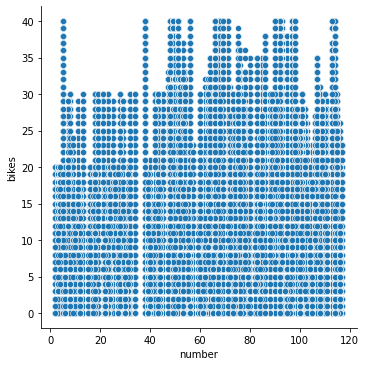

In [45]:
sns.relplot(x='number', y='bikes', data=df) #getting idea of how many bikes on average are available to a station

In [46]:
df.dtypes

number         int64
status         int64
bikes          int64
bike_stands    int64
banking        int64
time           int64
day            int64
dtype: object

<AxesSubplot:>

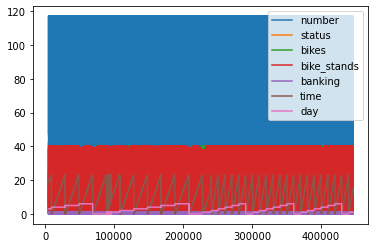

In [47]:
df.plot()

# Section 3 

In this section I utilise two data training models and compare results. I first train a linear regression model, which produced an R2 accuracy score of .62, I felt that this result was quite poor and decided to attempt a different model. In a separate college Module, Data Analytics (COMP47350), we learned about the Forest Regression model. The difference between the two is that in Forest Regression, expanding decision trees are constructed to account for data variability. Unlike Linear Regression, Forest Regression supports non linearity when searching the data set, this seems to be ideal for a dataset that has a considerable amount of noise and a large search area. 

Some observations made in terms of running is that I noticed interestingly that Forest Regression took longer than Linear Regression (which in nature as it searches an entire dataset would typically take longer to run). I put that down perhaps to the Forest Regressor having to sort data into branches. 

In [48]:
train = ['number','bike_stands','banking','status','time','day']
test = ['bikes']
to_train = df[train]
to_test = df[test]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(to_train, to_test, test_size=0.3)
X_train

,number,bike_stands,banking,status,time,day
109552,5,4,0,1,1,2
210691,79,27,0,1,2,0
145806,25,12,0,1,21,3
294127,11,26,0,1,7,0
369506,48,23,0,1,21,0
...,...,...,...,...,...,...
163858,16,9,0,1,18,4
374278,82,13,0,1,8,1
218357,71,38,0,1,12,0
342824,92,10,0,1,4,5


In [50]:
lr = LinearRegression() #calling the linear regression model

In [52]:
lr.fit(X_train,y_train) #applying sklearn to fit model

LinearRegression()

In [53]:
predictions = lr.predict(X_test) 

In [2245]:
lr.score(X_test,y_test)

0.6237922473034015

In [2246]:
#checking for accuracy, margins of error
mae = print(metrics.mean_absolute_error(y_test, lr.predict(X_test)))
rootmse =  print(metrics.mean_squared_error(y_test, lr.predict(X_test))**0.5)
r2 =  print(metrics.r2_score(y_test, lr.predict(X_test)))

4.509514893051422
5.537407417649619
0.6237922473034015


In [54]:
rforest = RandomForestRegressor(random_state=0, n_estimators=100)
rforest=rforest.fit(X_train,y_train.bikes)
print(rforest.score(X_test, y_test.bikes))

0.9976707930416056


In [55]:
#vast improvement in accuracy and margins of error in forest regressor
mae = print(metrics.mean_absolute_error(y_test, rforest.predict(X_test)))
rootmse =  print(metrics.mean_squared_error(y_test, rforest.predict(X_test))**0.5)
r2 =  print(metrics.r2_score(y_test, rforest.predict(X_test)))

0.06269530690346
0.43637930597172075
0.9976707930416056


In [2249]:
Ytest.bikes

85274     30
318504     4
200214    16
182399     8
195259    24
          ..
86929     10
220018    14
164423     8
55301     17
49220      3
Name: bikes, Length: 114277, dtype: int64

<AxesSubplot:xlabel='time', ylabel='bikes'>

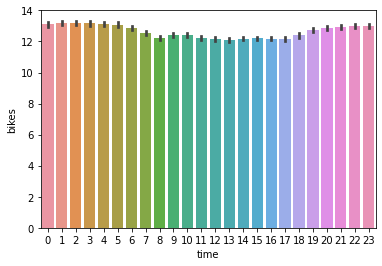

In [2250]:
sns.barplot(data=df,x='time',y='bikes') #checking variability of general bike availability by hour

<AxesSubplot:xlabel='day', ylabel='bikes'>

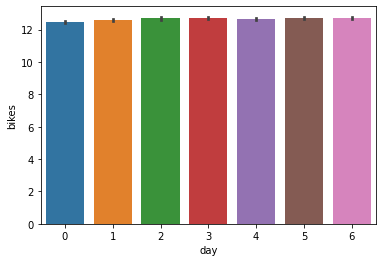

In [2251]:
sns.barplot(data=df,x='day',y='bikes') #checking variability of bike availability by day

In [2252]:
pickle.dump(lr, open('datamodel.pkl','wb')) #created datamodel that concentrated on overarching data

In [58]:
#assigning days of week to ints 
monday = df[df.day == 0]
tuesday = df[df.day == 1]
wednesday = df[df.day == 2]
thursday = df[df.day == 3]
friday = df[df.day == 4]
saturday = df[df.day == 5]
sunday = df[df.day == 6]

num_stations = df.number.max()

In [59]:
print(df)

        number  status  bikes  bike_stands  banking  time  day
4745        42       1     24            6        0    19    3
4746        30       1      0           20        0    19    3
4747        54       1      8           25        0    19    3
4748       108       1     17           18        0    19    3
4749        56       1     14           26        0    19    3
...        ...     ...    ...          ...      ...   ...  ...
446457      39       1     11            9        0    15    1
446458      83       1      8           32        0    15    1
446459      92       1      0           40        0    15    1
446460      21       1      6           24        0    15    1
446461      88       1     10           20        0    15    1

[441717 rows x 7 columns]


In [61]:
"""Created data model that loops through each day and station, every station individually
    has predictions trained for each day of the week, of which the trained models are saved
    to a pickle file to be deployed in Flask on request from JavaScript
"""
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
path = "/Users/os/Desktop/stations"
for i in range(7):
    for j in range(2, num_stations):
        if j in pd.Series(df.number).values:
            day_df = df[df.day == i]
            station_df = day_df[day_df.number == j]
            features = ['time']
            X = station_df[features]
            y = station_df.bikes

            X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.5,random_state=0)

            regressor = RandomForestRegressor(n_estimators=100)

            regressor.fit(X_train, y_train)

            if not os.path.exists(f'{path}/{j}'):
                os.makedirs(f'{path}/{j}')
            with open(f'{path}/{j}/{days[i]}.pkl', 'wb') as handle:
                pickle.dump(regressor, handle, pickle.HIGHEST_PROTOCOL)


            y_pred = regressor.predict(X_test)
            prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

            print(f'Test Set Predictions for Station {j} on a {days[i]}: ')
            print(prediction_df)
            print()

Test Set Predictions for Station 2 on a monday: 
        Actual  Predicted
295129       0   3.122699
220474       2   5.482447
70325       12   6.476198
437719       9   8.096347
76730        0   1.831455
...        ...        ...
296809       2   5.482447
292084       6   6.336095
431314       3   6.336095
227089      13  13.170192
211339       1   6.388378

[332 rows x 2 columns]

Test Set Predictions for Station 3 on a monday: 
        Actual  Predicted
430912      11  15.055473
220492      10  10.071597
70238       18  15.055473
367282       0   9.060739
76748       14   8.476969
...        ...        ...
226057       8   7.119702
85358       19   8.689288
74123       15   7.957721
435217       3   8.591518
293467       9   7.957721

[334 rows x 2 columns]

Test Set Predictions for Station 4 on a monday: 
        Actual  Predicted
295091      18  16.169207
220436      17  10.579389
70182       17  16.951091
437681       3   3.440839
76587       20  19.427096
...        ...        .

Test Set Predictions for Station 26 on a monday: 
        Actual  Predicted
431002      17   9.494169
220792      10  13.520729
70223        4   9.494169
367372      18  11.774027
76733       17  17.671413
...        ...        ...
226357       4   7.763630
85343       13   8.797725
74108        5  11.904091
435307      11  13.495310
293662      12  11.904091

[334 rows x 2 columns]

Test Set Predictions for Station 27 on a monday: 
        Actual  Predicted
216250      12  14.825647
223390      12   9.570394
70301        0   0.691357
299410       0   3.853204
76706       15  14.825647
...        ...        ...
74186        2   3.944916
365035      12  14.678419
300040       2   5.556966
227065       8   5.556966
432865      13   3.944916

[333 rows x 2 columns]

Test Set Predictions for Station 28 on a monday: 
        Actual  Predicted
295151      13   9.599495
220496      18  12.771050
70242       16  18.760293
437741      22  13.699588
76647       12  11.716273
...        ...      

Test Set Predictions for Station 53 on a monday: 
        Actual  Predicted
216138      15  22.928112
223278       7   8.219569
70189       25   9.785796
299403       2   3.657390
76594       34  22.928112
...        ...        ...
74074       26  11.731941
365028      16  24.890895
300033       2   4.525250
226953       4   4.525250
432858      13  11.731941

[333 rows x 2 columns]

Test Set Predictions for Station 54 on a monday: 
        Actual  Predicted
430924      23  13.291942
220714       1  20.340799
70145       14  13.291942
367294      21  12.414465
76655       15  17.984897
...        ...        ...
220819       1  20.340799
226279       0  14.341813
85265        7  11.071356
74030       14  18.540735
435229      29  10.190916

[333 rows x 2 columns]

Test Set Predictions for Station 55 on a monday: 
        Actual  Predicted
430849       8   7.942483
220429      20  13.780143
70175        4   7.942483
367219      15  11.281701
76685       13  16.313157
...        ...      

Test Set Predictions for Station 78 on a monday: 
        Actual  Predicted
216167      19  14.134719
223307      16  15.372868
70218       19  14.170690
299432       8  15.558604
76623       20  14.134719
...        ...        ...
74103       18  13.413048
365057      12  15.014320
300062      10  14.357564
226982      16  14.357564
432887       9  13.413048

[333 rows x 2 columns]

Test Set Predictions for Station 79 on a monday: 
        Actual  Predicted
430981       8   6.239974
220771       5   6.961026
70202       14   6.239974
367351       6   7.611068
76712       11   9.131144
...        ...        ...
226336       3   6.058802
85322       16   6.097513
74087       14   7.285022
435286       0   9.085089
293641       7   7.285022

[334 rows x 2 columns]

Test Set Predictions for Station 80 on a monday: 
        Actual  Predicted
216185      30  19.373799
223325      13   6.622526
70236        4  10.585358
299450      12   4.205625
76641       15  19.373799
...        ...      

Test Set Predictions for Station 102 on a monday: 
        Actual  Predicted
216136       6   3.137550
223276      10   9.823988
70187        9   9.802671
299401       5  12.047287
76592        2   3.137550
...        ...        ...
74072        8   7.881833
365026       3   3.908071
300031       6  10.122434
226951       7  10.122434
432856       5   7.881833

[333 rows x 2 columns]

Test Set Predictions for Station 103 on a monday: 
        Actual  Predicted
295150       1  14.615888
220495      12  13.408952
70241        4   4.384748
437740       1   7.023587
76646       15  12.569744
...        ...        ...
296830       8  13.408952
292105       2   4.163739
431335       0   4.163739
227110       5   3.132191
211360       5   3.969105

[332 rows x 2 columns]

Test Set Predictions for Station 104 on a monday: 
        Actual  Predicted
430970       1   1.996277
220865       9  10.109882
70296        1   1.996277
367340       8  10.819162
76806       13   8.419946
...        ...   

Test Set Predictions for Station 10 on a tuesday: 
        Actual  Predicted
440769       0   6.422549
371049       5   6.422549
95845       11   9.814266
303954      11  10.833214
233079      13   5.918924
...        ...        ...
378504      12  14.413283
229404      12   6.422549
104140      16  15.171994
104665      15  14.413283
93010        1   5.918924

[280 rows x 2 columns]

Test Set Predictions for Station 11 on a tuesday: 
        Actual  Predicted
440602       2   3.344631
370882      10   2.158278
95783       13   9.600631
303787       9   9.535637
233017       2   2.377673
...        ...        ...
378337       4   4.974707
229342       1   3.344631
104078       2   4.974707
104603       3   3.744303
92948        1   2.377673

[280 rows x 2 columns]

Test Set Predictions for Station 12 on a tuesday: 
        Actual  Predicted
373245       4   7.591107
105916      12  12.137081
308985      16  10.818351
230760       3   6.856577
97411        2   2.283201
...        ...   

Test Set Predictions for Station 38 on a tuesday: 
        Actual  Predicted
104943      19  24.299967
303707      10  22.171408
304022       7  16.964452
372587      37  22.381561
378782      40  24.299967
...        ...        ...
104103      23  29.875378
104628      20  24.299967
92973       31  24.395544
441782      20  22.381561
380147      38  32.022460

[279 rows x 2 columns]

Test Set Predictions for Station 39 on a tuesday: 
        Actual  Predicted
440787       0   4.815492
371067       8   4.815492
95863        3   6.027640
303972       4   6.448741
233097       4   4.360255
...        ...        ...
378522       8   4.447999
229422       5   4.815492
104158       0   2.615832
104683       0   4.447999
93028        5   4.360255

[280 rows x 2 columns]

Test Set Predictions for Station 40 on a tuesday: 
        Actual  Predicted
104994      19  15.065423
380093       0   7.349439
230363       3   4.115658
305648      17   8.705700
378728       7  15.065423
...        ...   

Test Set Predictions for Station 62 on a tuesday: 
        Actual  Predicted
440720       2   8.791625
371000      11   8.791625
95796       18  19.537978
303800       8  18.047865
233030      10  11.606475
...        ...        ...
378455       7   6.512932
229355      10   8.791625
104091       7   7.077425
104616       8   6.512932
92961       18  11.606475

[280 rows x 2 columns]

Test Set Predictions for Station 63 on a tuesday: 
        Actual  Predicted
440606       4  16.359408
370886      20  14.655886
95787       18  20.252955
303791      11  16.003410
233021      20  16.158698
...        ...        ...
378341       9  13.368575
229346      20  16.359408
104082      17  13.368575
104607      18  10.978689
92952       19  16.158698

[280 rows x 2 columns]

Test Set Predictions for Station 64 on a tuesday: 
        Actual  Predicted
440667      11  10.689229
370947       5  13.354010
95848       15  11.883408
303852       5  12.609627
233082      12  13.679145
...        ...   

Test Set Predictions for Station 86 on a tuesday: 
        Actual  Predicted
104981       6   7.342577
303745       4  10.006449
304060       1   5.208524
372625       9  10.276559
378820      10   7.342577
...        ...        ...
104141       4   6.594792
104666       3   7.342577
93011       18  10.495589
441820       9  10.276559
380185      14   9.755891

[279 rows x 2 columns]

Test Set Predictions for Station 88 on a tuesday: 
        Actual  Predicted
440791      14  23.493445
371071      30  23.493445
95867        6  15.669681
303871      26  17.490578
233101      23  21.218395
...        ...        ...
378526      24  16.225869
229426      23  23.493445
104162       2  13.469376
104687       8  16.225869
93032       15  21.218395

[280 rows x 2 columns]

Test Set Predictions for Station 89 on a tuesday: 
        Actual  Predicted
98164       16  21.945568
103099      19  14.210965
99319       19  18.391276
100474      19  18.253292
103939       9   5.847488
...        ...   

Test Set Predictions for Station 109 on a tuesday: 
        Actual  Predicted
440669      22  19.227981
370949      29  21.828306
95850       16  14.754995
303854       9  18.006075
233084      17  19.750916
...        ...        ...
378404      28  20.772886
229409      18  19.227981
104145      21  20.772886
104670      23  20.642887
93015       23  19.750916

[280 rows x 2 columns]

Test Set Predictions for Station 110 on a tuesday: 
        Actual  Predicted
104970       7  10.947253
303734      19  15.579573
304049      19  15.579573
372614      13  13.328436
378809      27  10.947253
...        ...        ...
104130       6  17.236039
104655       7  10.947253
93000       19  16.793135
441809       5  13.328436
380174      24  11.036249

[279 rows x 2 columns]

Test Set Predictions for Station 111 on a tuesday: 
        Actual  Predicted
104976      13   8.119229
380075      13  15.976238
230345       8  12.946193
305630       8   8.327151
378710       7   8.119229
...        ...

Test Set Predictions for Station 18 on a wednesday: 
        Actual  Predicted
116349      26  18.177130
117924      24  21.386583
247283      21  23.302201
242663      28  24.862379
386303      28  20.567426
...        ...        ...
389453      26  22.753048
387248      26  21.468676
314063       5  21.682926
119814      24  20.631041
318893       9  24.360063

[237 rows x 2 columns]

Test Set Predictions for Station 19 on a wednesday: 
        Actual  Predicted
119219      26  25.079092
116489      25  25.063654
110714       1   7.068515
316198      30  23.710666
128039       2   2.959295
...        ...        ...
119849      25  23.710666
318928       4   3.800343
244168       9  11.955076
113339       2   5.176330
380878      12   6.748282

[237 rows x 2 columns]

Test Set Predictions for Station 21 on a wednesday: 
        Actual  Predicted
116551      26  22.443557
118126      12  20.507067
247485      13  14.527101
242865      10   7.825822
386400      16  16.131128
...        

Test Set Predictions for Station 45 on a wednesday: 
        Actual  Predicted
119094      12  13.343945
116364      12  10.803310
110589      15  19.728273
316178      17   9.622205
127914      19  24.175226
...        ...        ...
119724      11   9.622205
318908      28  21.296118
244043       6  12.657226
113214      15  16.240559
380858      28  19.583010

[237 rows x 2 columns]

Test Set Predictions for Station 47 on a wednesday: 
        Actual  Predicted
116393      11  14.772690
117968      12  15.055751
247327       4  10.879727
242707       2   3.636982
386347      14  14.009689
...        ...        ...
389497       0   8.540980
387292       4  12.028921
314107      16   8.612646
119858      12  13.150469
318937      10   6.131658

[237 rows x 2 columns]

Test Set Predictions for Station 48 on a wednesday: 
        Actual  Predicted
116247      29  21.671392
117822      33  17.758572
247391      12  14.205416
242771      17  18.914933
386411       4  13.694120
...        

Test Set Predictions for Station 69 on a wednesday: 
        Actual  Predicted
119239      35  29.604724
116509      31  18.782732
110734      12  12.769584
316218      28  29.604724
128059      25  19.709495
...        ...        ...
119869      37  29.604724
318948      17  13.271404
244083      10  19.557231
113359      13  13.219027
380898       9  14.154229

[237 rows x 2 columns]

Test Set Predictions for Station 71 on a wednesday: 
        Actual  Predicted
116403       9   7.944886
117978       7   6.670340
247337       0  10.977709
242717       0  16.424576
386357      15   8.574407
...        ...        ...
389507      16   4.281740
387302      13   7.639616
314117       7   9.578685
119868       9   7.394069
318947       2   5.414905

[237 rows x 2 columns]

Test Set Predictions for Station 72 on a wednesday: 
        Actual  Predicted
119308       7   7.780754
116578       6   4.408518
110803       7  11.049239
316392      13   7.780754
128128      19  17.035783
...        

Test Set Predictions for Station 94 on a wednesday: 
        Actual  Predicted
116304       6   3.138699
117879       6   2.529399
247343       2   2.017821
242723       3   2.891036
386363       0   2.844164
...        ...        ...
389513       1   2.386906
387308       1   3.700589
314123       0   2.860674
119769       5   2.484024
318953       0   2.670531

[237 rows x 2 columns]

Test Set Predictions for Station 95 on a wednesday: 
        Actual  Predicted
119348      17  15.380758
116618      19  17.257252
110843      32  27.350148
316432      15  15.380758
128168      27  26.124891
...        ...        ...
314332      18  20.179267
119978      16  15.380758
319162      27  21.136138
244192      14  21.438718
113468      29  24.353167

[236 rows x 2 columns]

Test Set Predictions for Station 96 on a wednesday: 
        Actual  Predicted
116295       0   1.892241
117870       1   1.788517
247439      10   8.901961
242819       9   8.375080
386354      10   8.969520
...        

Test Set Predictions for Station 2 on a thursday: 
        Actual  Predicted
256804       0   7.690738
134795       1   5.855873
8707        10   7.698671
129125       4   6.075476
326209      11   6.685018
...        ...        ...
8392        10   7.698671
395404      13   6.685018
391414       8   7.041413
325054       3   4.085397
253864       0   4.754866

[257 rows x 2 columns]

Test Set Predictions for Station 3 on a thursday: 
        Actual  Predicted
256822      14   9.133718
134813       5   7.799817
8725         4   3.782584
129143      10   9.967872
392692      10   9.034934
...        ...        ...
390697      11   9.967872
327172      10   8.674829
325072       8  12.573923
253777      14   6.333979
251362      15   9.967872

[258 rows x 2 columns]

Test Set Predictions for Station 4 on a thursday: 
        Actual  Predicted
256766      20  11.307696
134652       8  12.512865
8669        10   7.629169
128982       3   4.965307
326171      20  19.770409
...        ...   

Test Set Predictions for Station 26 on a thursday: 
        Actual  Predicted
256807      13  13.113065
134693       7  11.772947
8710         9   7.390106
129023       2   4.121845
392677       6   3.976494
...        ...        ...
390682       6   4.121845
327157      16  12.977418
325057      19  14.308910
253762      15   7.277515
251347      15   4.121845

[258 rows x 2 columns]

Test Set Predictions for Station 27 on a thursday: 
        Actual  Predicted
146531       4   7.161032
391810       0   2.989094
322615       0   2.141768
251005      11   2.956708
142121       7  13.567314
...        ...        ...
143171      13  14.729665
137396      20  18.757124
328495      14  13.238156
328810      13  12.379128
328705      11  13.238156

[259 rows x 2 columns]

Test Set Predictions for Station 28 on a thursday: 
        Actual  Predicted
257036      23  15.555748
134922      13  14.209998
8729        16  17.014145
129252      18  16.109040
326336       5  12.609170
...        ...

Test Set Predictions for Station 53 on a thursday: 
        Actual  Predicted
256773       0   5.356047
134764       2   4.133424
8676         9   4.412900
129094       0   2.875362
392643       7   0.798912
...        ...        ...
390648       8   2.875362
327228      16  10.173460
325128      14  16.456509
253728       0   2.169415
251313       0   2.875362

[258 rows x 2 columns]

Test Set Predictions for Station 54 on a thursday: 
        Actual  Predicted
256729      15  10.649077
134720       1   7.720857
8632         9  10.652193
129050       0   6.608729
392599      16   3.946528
...        ...        ...
390604      17   6.608729
327184      14  13.300569
325084      14  11.240978
253684       5   5.358062
251269       4   6.608729

[258 rows x 2 columns]

Test Set Predictions for Station 55 on a thursday: 
        Actual  Predicted
133700       9   9.663473
330679       7   2.666381
142100      17  12.608774
328159      15  11.582572
258439       2  11.582572
...        ...

Test Set Predictions for Station 77 on a thursday: 
        Actual  Predicted
256764      29  20.470558
134755      11  14.780268
8667        12  13.714749
129085       8   8.516815
326169      14  23.523460
...        ...        ...
8352        12  13.714749
390639      13   8.516815
391374      13  11.081891
325014      24  17.604848
253824      29   8.685047

[257 rows x 2 columns]

Test Set Predictions for Station 78 on a thursday: 
        Actual  Predicted
256802      12   8.100847
134793      10  15.846332
8705        20  13.656521
129123       6  14.670380
392672      29  11.992548
...        ...        ...
390677      29  14.670380
327152       8  10.224089
325052       9  10.660335
253757      13  13.526484
251342      13  14.670380

[258 rows x 2 columns]

Test Set Predictions for Station 79 on a thursday: 
        Actual  Predicted
133622       3   8.488710
330601       3   6.158608
142022       2   6.741437
328081       6   4.675897
258361       6   4.675897
...        ...

Test Set Predictions for Station 101 on a thursday: 
        Actual  Predicted
256776      16   6.522229
134767       0   5.357351
8679        16  17.780261
129097       6  13.247851
392646      26   9.302709
...        ...        ...
390651      30  13.247851
327126       7  10.712588
325026       2   3.278617
253731       6   8.554861
251316       9  13.247851

[258 rows x 2 columns]

Test Set Predictions for Station 102 on a thursday: 
        Actual  Predicted
256876       0   6.839546
134762      13   6.109536
8674        14  11.588583
129092      16  12.057985
392641       8  10.843771
...        ...        ...
390646       9  12.057985
327226      17   9.645679
325126       6   4.820733
253831       0  11.625563
251416       0  11.409536

[258 rows x 2 columns]

Test Set Predictions for Station 103 on a thursday: 
        Actual  Predicted
256930       0   7.147549
134816       2   2.315288
8728         0   0.135987
129146       1   2.776562
392695       8   1.624710
...        

Test Set Predictions for Station 9 on a friday: 
        Actual  Predicted
265156      21  14.978761
160367       5  13.841336
10322        7   4.819243
407746      14  16.367934
16727        6  12.440425
...        ...        ...
266836      24  13.841336
262111       3   5.203318
401341       3   5.203318
166982      22  18.480893
151232       6   5.236612

[332 rows x 2 columns]

Test Set Predictions for Station 10 on a friday: 
        Actual  Predicted
156220      16  12.757077
163360      15  15.762909
10375       16  10.443780
269514      15  15.661889
16780        2  12.757077
...        ...        ...
14260       14   6.341674
335139      14  10.526087
270144      16  15.394683
167035      16  14.436144
402969       8   6.341674

[333 rows x 2 columns]

Test Set Predictions for Station 11 on a friday: 
        Actual  Predicted
265357       7  12.183205
160568      14   7.538109
10418        0   5.791760
407737       2   4.525335
16823        6  12.242817
...        ...       

Test Set Predictions for Station 34 on a friday: 
        Actual  Predicted
401071      30  20.596393
160727      11  13.256699
10367       19  20.596393
337441      14  14.833433
16877       23  17.565670
...        ...        ...
160832      11  13.256699
166292      16  19.594505
25487       26  17.707300
14252       20  20.093402
405376      18  14.873430

[333 rows x 2 columns]

Test Set Predictions for Station 38 on a friday: 
        Actual  Predicted
337937      26  30.512198
19788       29  24.707968
10443       37  35.721533
336362      20  24.707968
159753      16  24.707968
...        ...        ...
266957      29  25.512936
262232      36  35.024873
164583      18  29.518627
266012      40  23.874443
151458      38  35.024873

[331 rows x 2 columns]

Test Set Predictions for Station 39 on a friday: 
        Actual  Predicted
265332       6   9.554744
160543      10   5.393777
10603        4   5.705349
407817       3   4.541857
17008        6   9.993756
...        ...      

Test Set Predictions for Station 61 on a friday: 
        Actual  Predicted
265163       1   8.012400
160374      16  11.555420
10434        4   3.471098
407753       7   5.912305
16839        4   5.796806
...        ...        ...
266843       6  11.555420
262118       0   3.454476
401348       4   3.454476
166989       6   3.664229
151239       2   3.457736

[332 rows x 2 columns]

Test Set Predictions for Station 62 on a friday: 
        Actual  Predicted
156276      15  14.367149
163416      10   5.454369
10431        3   4.103813
269570       2   4.045879
16836       23  14.367149
...        ...        ...
14316        4   5.219979
335090      15  17.401077
270200       2   4.251694
167091      10   4.251694
402920       7   5.219979

[333 rows x 2 columns]

Test Set Predictions for Station 63 on a friday: 
        Actual  Predicted
265256       8  12.931074
160467      12  13.291601
10422       13  10.614033
407741       5   8.273062
16827       10  12.873219
...        ...      

Test Set Predictions for Station 85 on a friday: 
        Actual  Predicted
156121      18   8.900581
163261      23  14.589145
10486       11  18.247738
269520       9  14.690533
16891        1   8.900581
...        ...        ...
14371       11  17.386471
335145       8  13.904249
270150      10  15.970185
166936      24  17.263994
402975      13  17.386471

[333 rows x 2 columns]

Test Set Predictions for Station 86 on a friday: 
        Actual  Predicted
265315      20   6.779570
160526      12  10.958931
10481       10  10.390603
407800      14  12.261200
16886        0   3.577571
...        ...        ...
266995      31  10.958931
262270      23  10.206743
401395       8  11.273935
167141       4  10.227215
151391       8  10.206743

[332 rows x 2 columns]

Test Set Predictions for Station 88 on a friday: 
        Actual  Predicted
156347      13   8.998555
163487      15  10.179133
10607       18  15.341166
269641      14  11.242158
17012       16   8.998555
...        ...      

Test Set Predictions for Station 108 on a friday: 
        Actual  Predicted
401000      18  15.014980
160761      10   7.991925
10401       17  15.014980
337475      26   9.191288
16911        0   6.220206
...        ...        ...
160866      11   7.991925
166326       9  10.260906
25521        0   9.227435
14286       15  13.814372
405305      21   6.218646

[333 rows x 2 columns]

Test Set Predictions for Station 109 on a friday: 
        Actual  Predicted
156225      22   9.917854
163365      21  13.862266
10485       16  20.734337
269624      22  17.525214
16890       10   9.917854
...        ...        ...
14370       13  15.786483
335144       3  12.252848
270254      22  20.969678
167040      29  20.969678
402974       6  15.786483

[333 rows x 2 columns]

Test Set Predictions for Station 110 on a friday: 
        Actual  Predicted
401069      18  14.028773
160725      12  15.581543
10365       19  14.028773
337439      14  13.940959
16875       16  13.699848
...        ...   

Test Set Predictions for Station 17 on a saturday: 
        Actual  Predicted
275439      20  14.066375
180520       9  14.580095
30370       18  12.901647
417714      12  12.769441
36775       20  13.931689
...        ...        ...
277119      15  14.731885
272394      18  12.099264
411309       7  13.744918
187135       6  13.923827
171385       8  12.582282

[332 rows x 2 columns]

Test Set Predictions for Station 18 on a saturday: 
        Actual  Predicted
275318      18  17.954084
180294      21  18.963747
30354       23  19.555970
417698      29  29.095427
36759       20  15.856117
...        ...        ...
276998      10  18.963747
272273      16  19.781472
411293      14  19.673939
186909      29  26.431483
171159      20  19.781472

[332 rows x 2 columns]

Test Set Predictions for Station 19 on a saturday: 
        Actual  Predicted
275248      16  13.180712
180329      10  11.766424
30389        9   4.557397
417733       2  13.063657
36794       15  12.283698
...        ...

Test Set Predictions for Station 44 on a saturday: 
        Actual  Predicted
275507       0   9.668526
180483       1   6.179411
30438       28  18.965634
417782      15   6.936259
36843       15  14.259509
...        ...        ...
277187       0   6.179411
272462       5  25.250576
411377      30  18.507682
187098       2   6.368639
171348      18  25.250576

[332 rows x 2 columns]

Test Set Predictions for Station 45 on a saturday: 
        Actual  Predicted
347993      20  14.770873
39714       19  18.858159
30369       21  25.048983
346418      23  18.858159
179574      13  18.858159
...        ...        ...
277013      27  16.816238
272288      28  21.616445
184404      12  17.811200
276068      29  17.997431
171279      29  21.616445

[331 rows x 2 columns]

Test Set Predictions for Station 47 on a saturday: 
        Actual  Predicted
275467       8   3.604026
180443       0   2.409908
30398        6   3.911794
417742       1   4.238054
36803        5   3.744058
...        ...

Test Set Predictions for Station 68 on a saturday: 
        Actual  Predicted
275328       5   4.553704
180409       2   6.496244
30364        3   2.459280
417708       3   5.023938
36769        4   3.677988
...        ...        ...
277008       7   6.496244
272283       7   2.128764
411303       2   3.352308
187024       5   9.256308
171274       0   2.128764

[332 rows x 2 columns]

Test Set Predictions for Station 69 on a saturday: 
        Actual  Predicted
275268      33  17.192638
180349       4  11.246932
30409       11  18.851831
417753      20  11.604652
36814       10  16.575176
...        ...        ...
276948      35  11.246932
272223      31  20.057233
411348      35  19.713899
186964      20  17.134622
171214      21  20.057233

[332 rows x 2 columns]

Test Set Predictions for Station 71 on a saturday: 
        Actual  Predicted
348032      18  15.698508
39753       10  11.127745
30408        6   7.930176
346457      16  11.127745
179613       8  11.127745
...        ...

Test Set Predictions for Station 93 on a saturday: 
        Actual  Predicted
275486      35  34.832871
180567      38  32.028818
30522       38  36.111408
417761      20  33.332984
36927       37  33.192393
...        ...        ...
277166      30  32.028818
272441      36  33.352749
411356      21  36.111408
187182      38  29.833511
171432      38  32.584447

[332 rows x 2 columns]

Test Set Predictions for Station 94 on a saturday: 
        Actual  Predicted
348143       1   4.276341
39759        6   3.734305
30414        6   3.724974
346568       1   4.318585
179619       4   3.734305
...        ...        ...
277058       2   4.318585
272333       2   4.399607
184449       4   4.155167
276113       2   3.682402
171324       4   4.399607

[331 rows x 2 columns]

Test Set Predictions for Station 95 on a saturday: 
        Actual  Predicted
348247       6   4.246980
39863        3  11.091686
30518       16  21.333994
346672       4   5.003759
179828      18   5.003759
...        ...

Test Set Predictions for Station 116 on a saturday: 
        Actual  Predicted
275447       5  14.205159
180423      19  12.209522
30483       15  14.843453
417722      16  12.088314
36888       14  15.541622
...        ...        ...
277127       0  12.209522
272402       9  17.392438
411317      20  14.843453
187038      22  10.938603
171288      19  17.392438

[332 rows x 2 columns]

Test Set Predictions for Station 2 on a sunday: 
        Actual  Predicted
420919      14   5.583813
200629       0   7.236479
50375        3   5.583813
357394      11   5.837835
56885        1   3.058010
...        ...        ...
65495       11   5.691840
54260        3   6.750011
287149       1   7.236479
282319       7   6.219631
204829       2   6.780733

[335 rows x 2 columns]

Test Set Predictions for Station 3 on a sunday: 
        Actual  Predicted
421042      18  18.601434
200857      11  13.515375
50393       18  18.601434
357517      12  15.674052
56903       18  15.481785
...        ...     

Test Set Predictions for Station 25 on a sunday: 
        Actual  Predicted
420905      11   4.859508
200720       6   8.331171
50256        5   4.859508
357380       7   7.949251
56766        7   7.203638
...        ...        ...
206285       5   5.799789
65376        7   6.571603
54141        5   6.368893
425210      16   6.054085
283565       8   6.368893

[334 rows x 2 columns]

Test Set Predictions for Station 26 on a sunday: 
        Actual  Predicted
421027      10   5.078249
200842       5  10.495915
50378        6   5.078249
357397      15   8.933890
56888        5   9.558163
...        ...        ...
200947       5  10.495915
206407      12  13.702144
65498        5  13.824749
54263        6   8.527615
425332      20   8.453917

[333 rows x 2 columns]

Test Set Predictions for Station 27 on a sunday: 
        Actual  Predicted
420895      15  11.506489
200605      19  13.482050
50246       15  11.506489
357370       5  14.075591
56756       17  13.908325
...        ...      

Test Set Predictions for Station 52 on a sunday: 
        Actual  Predicted
420955      32  24.208471
200770      32  22.755497
50306       21  24.208471
357325      16  22.732814
56816       26  24.493338
...        ...        ...
200875      32  22.755497
206335      25  20.435274
65426       15  21.528981
54191       22  25.025142
425260      29  25.442853

[333 rows x 2 columns]

Test Set Predictions for Station 53 on a sunday: 
        Actual  Predicted
420993       4  10.863103
200808       6  14.801111
50344       21  10.863103
357468       3  12.305531
56854       21   9.222664
...        ...        ...
206373       3   9.967010
65464       26   9.856889
54229       21   8.878041
425298       6  11.779836
283653       9   8.878041

[334 rows x 2 columns]

Test Set Predictions for Station 54 on a sunday: 
        Actual  Predicted
420844      20  12.868463
200554       2  13.269565
50195       16  12.868463
357214      22  15.310468
56705       17  18.402913
...        ...      

Test Set Predictions for Station 76 on a sunday: 
        Actual  Predicted
420795       3  18.478637
200610      20  15.947483
50251       20  18.478637
357270       6  14.141567
56761       19  16.644363
...        ...        ...
65371       10  10.496828
54136       20   9.088866
287025      19  15.947483
282195       2  18.257500
204810      10  10.496828

[335 rows x 2 columns]

Test Set Predictions for Station 77 on a sunday: 
        Actual  Predicted
420879      24  26.085854
200694      26  19.646098
50335       27  26.085854
357354      20  22.818264
56845       26  22.169752
...        ...        ...
65455       13  17.872696
54220       26  22.708729
287109       4  20.306979
282279      29  25.988934
204894      19  17.814944

[335 rows x 2 columns]

Test Set Predictions for Station 78 on a sunday: 
        Actual  Predicted
421022      18  12.496950
200732      10  10.854805
50373       18  12.496950
357497       2  11.864904
56883       17  12.873138
...        ...      

Test Set Predictions for Station 100 on a sunday: 
        Actual  Predicted
420926      25  18.506667
200741      22  17.839241
50277       19  18.506667
357401       1  16.678342
56787       24  20.057785
...        ...        ...
65397        2  12.507693
54162       19  16.188221
287156      14  15.334503
282326      23  20.019197
204941      19  12.507693

[335 rows x 2 columns]

Test Set Predictions for Station 101 on a sunday: 
        Actual  Predicted
420891      26  13.261039
200706       0   8.445208
50242       18  13.261039
357366      14  11.219735
56752       13  13.897314
...        ...        ...
206271       8  17.762597
65362        9  14.905459
54127       17  14.446445
425196      13   8.498642
283551      30  14.446445

[334 rows x 2 columns]

Test Set Predictions for Station 102 on a sunday: 
        Actual  Predicted
420886       9  11.040663
200701      16  11.088302
50342       10  11.040663
357361      14  10.300931
56852       11  10.448289
...        ...   

From here I predicted the availability data for the overall dataset for each day. While I didn't end up using these pickle files in the final result, I felt the graphs serve as a useful guideline to typical availability 

<AxesSubplot:xlabel='time', ylabel='bikes'>

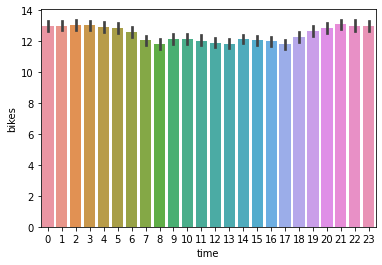

In [2212]:
#plot of the overarching availability predictions of bikes at all stations on a monday 
sns.barplot(data=monday,x='time',y='bikes')

In [103]:
X = tuesday[features]
y = tuesday.bikes

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

regressor = RandomForestRegressor(n_estimators=30)
regressor.fit(X_train, y_train)

with open('tuesday.pkl', 'wb') as handle:
    pickle.dump(regressor, handle, pickle.HIGHEST_PROTOCOL)
    

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
print(df)

        Actual  Predicted
377908      27  11.923180
93835        7  12.760427
101275       9  12.149855
92094       20  13.172037
380262      10  13.528273
...        ...        ...
96383       20  12.115923
373870       5  12.086023
307342       9  12.149855
308103       7  11.923180
236653      10  12.112823

[17573 rows x 2 columns]


<AxesSubplot:xlabel='time', ylabel='bikes'>

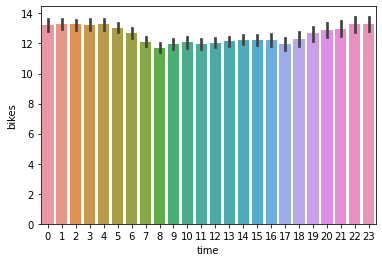

In [2016]:
sns.barplot(data=tuesday,x='time',y='bikes')

In [102]:
X = wednesday[features]
y = wednesday.bikes

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

regressor = RandomForestRegressor(n_estimators=30)
regressor.fit(X_train, y_train)
    

with open('wednesday.pkl', 'wb') as handle:
    pickle.dump(regressor, handle, pickle.HIGHEST_PROTOCOL)
    

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

        Actual  Predicted
386435      15  12.114324
127896       8  13.277067
385836       2  12.094396
126247      21  12.937152
117867      15  12.214418
...        ...        ...
248829       0  12.514347
316447      17  12.245197
118499       2  12.094396
112180      23  13.071530
316121       4  12.094396

[14894 rows x 2 columns]


<AxesSubplot:xlabel='time', ylabel='bikes'>

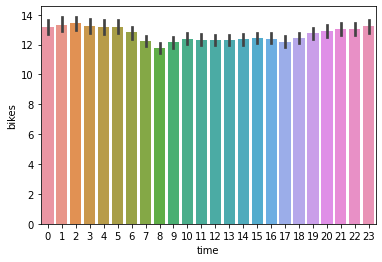

In [93]:
sns.barplot(data=wednesday,x='time',y='bikes')

In [101]:
X = thursday[features]
y = thursday.bikes

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

regressor = RandomForestRegressor(n_estimators=30)
regressor.fit(X_train, y_train)
    

with open('thursday.pkl', 'wb') as handle:
    pickle.dump(regressor, handle, pickle.HIGHEST_PROTOCOL)
    

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)   

        Actual  Predicted
256389       0  11.937851
130294       3  13.087906
326853      12  12.153285
328886      14  12.640189
137871       3  12.521280
...        ...        ...
328771      29  12.640189
329613      14  13.080611
328669       5  12.240987
321777       3  13.087906
135551       5  12.008222

[16214 rows x 2 columns]


<AxesSubplot:xlabel='time', ylabel='bikes'>

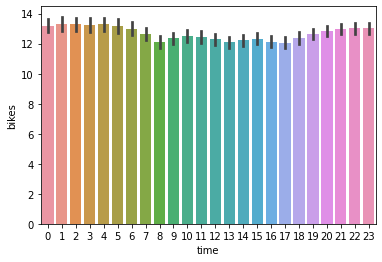

In [2020]:
sns.barplot(data=thursday,x='time',y='bikes')

In [100]:
X = friday[features]
y = friday.bikes

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

regressor = RandomForestRegressor(n_estimators=30)
regressor.fit(X_train, y_train)
    

with open('friday.pkl', 'wb') as handle:
    pickle.dump(regressor, handle, pickle.HIGHEST_PROTOCOL)
    

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

        Actual  Predicted
154981      15  12.345652
162813      11  12.169072
268241      36  12.169072
409515      24  12.937835
19846       11  12.121006
...        ...        ...
335040       8  12.643713
24564       17  12.147505
21058        2  12.214486
403757       0  12.188277
154238       0  12.345652

[20944 rows x 2 columns]


<AxesSubplot:xlabel='time', ylabel='bikes'>

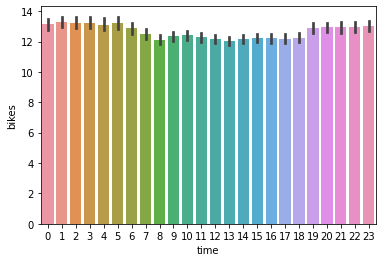

In [2022]:
sns.barplot(data=friday,x='time',y='bikes')

In [99]:
X = saturday[features]
y = saturday.bikes

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

regressor = RandomForestRegressor(n_estimators=30)
regressor.fit(X_train, y_train)
    

with open('saturday.pkl', 'wb') as handle:
    pickle.dump(regressor, handle, pickle.HIGHEST_PROTOCOL)
    

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

        Actual  Predicted
39065       12  12.083317
280551      10  12.849519
343069       6  13.200423
349691      19  12.792875
345596       8  12.147947
...        ...        ...
32676        8  13.040934
46375        1  12.792875
178175      16  12.083317
417390      38  12.483057
29760        3  13.078438

[20876 rows x 2 columns]


<AxesSubplot:xlabel='time', ylabel='bikes'>

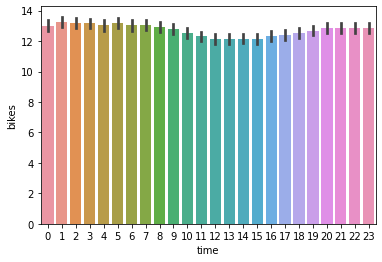

In [2024]:
sns.barplot(data=saturday,x='time',y='bikes')

In [97]:
X = sunday[features]
y = sunday.bikes

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=0)

regressor = RandomForestRegressor(n_estimators=30)
regressor.fit(X_train, y_train)
    

with open('sunday.pkl', 'wb') as handle:
    pickle.dump(regressor, handle, pickle.HIGHEST_PROTOCOL)
    

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

        Actual  Predicted
429983      26  12.936391
429181       8  12.729994
207048       5  12.773259
357463      14  12.060134
203573       0  12.558527
...        ...        ...
55663        1  12.935383
286816       0  12.073605
203004      18  12.364814
204729      16  12.632895
53182       17  12.941904

[21032 rows x 2 columns]


<AxesSubplot:xlabel='time', ylabel='bikes'>

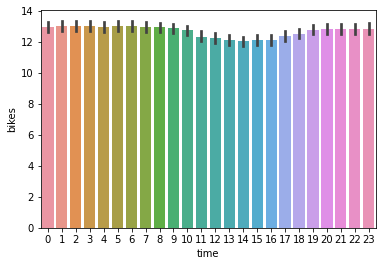

In [98]:
sns.barplot(data=sunday,x='time',y='bikes')